<a href="https://colab.research.google.com/github/Aritra-Bag/CODSOFT/blob/main/codsoft_task2_Credir_Card_Fraud_detection/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fraud-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
np.random.seed(42)

In [7]:
Fraud_Data = pd.read_csv('fraudTrain.csv')
Fraud_Data_Test = pd.read_csv('fraudTest.csv')

# Explore data

In [8]:
Fraud_Data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
Fraud_Data.shape

(1296675, 23)

In [10]:
Fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
Fraud_Data.isnull().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [12]:
Fraud_Data.duplicated().any()

False

In [13]:
# sns.countplot(Fraud_Data['is_fraud'])

<Axes: ylabel='count'>

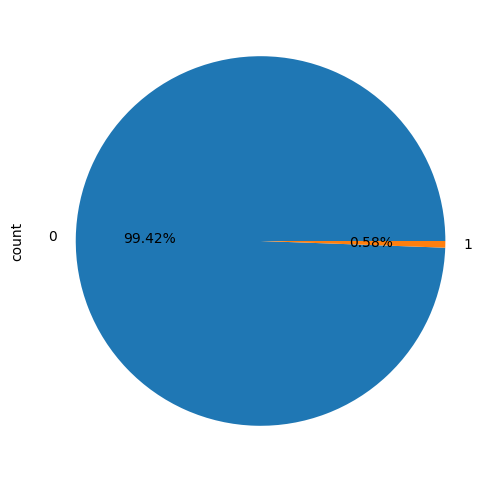

In [14]:
import matplotlib.pyplot as plt

# The overall fraud ratio
fig = plt.figure(figsize=(6,6))
Fraud_Data['is_fraud'].value_counts().plot.pie(autopct = '%1.2f%%')

In [15]:
df= Fraud_Data[['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'job', 'is_fraud']]

In [16]:
df[18:19]

,category,amt,gender,city,state,lat,long,job,is_fraud
18,food_dining,63.07,M,Harborcreek,PA,42.1767,-79.9416,Event organiser,0


# Under-sampling

## Train set

In [17]:
#from sklearn.utils import resample
df_majority= df[df.is_fraud==0]
df_minority= df[df.is_fraud==1]
print(df_majority.shape, df_minority.shape)

(1289169, 9) (7506, 9)


In [18]:
df_majority_upsampled= df_majority.sample(n=7506)

mydata3= pd.concat([df_majority_upsampled, df_minority], ignore_index=True)

print(df_majority_upsampled.shape, mydata3.shape)

(7506, 9) (15012, 9)


In [19]:
mydata3['is_fraud'].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

In [20]:
mydata3

,category,amt,gender,city,state,lat,long,job,is_fraud
0,gas_transport,86.19,F,Santa Monica,CA,34.0287,-118.4924,"Civil engineer, contracting",0
1,entertainment,85.81,F,Matthews,MO,36.7154,-89.6287,Aeronautical engineer,0
2,grocery_pos,99.30,F,Keisterville,PA,39.9636,-79.7853,Systems developer,0
3,home,42.09,F,Heart Butte,MT,48.2777,-112.8456,Water engineer,0
4,shopping_net,4.24,F,Kingsport,TN,36.4715,-82.4834,Warden/ranger,0
...,...,...,...,...,...,...,...,...,...
15007,shopping_net,977.01,F,Vero Beach,FL,27.6330,-80.4031,"Librarian, public",1
15008,shopping_net,1210.91,F,Vero Beach,FL,27.6330,-80.4031,"Librarian, public",1
15009,gas_transport,10.24,M,Denham Springs,LA,30.4590,-90.9027,Herbalist,1
15010,gas_transport,21.69,F,Notrees,TX,31.8599,-102.7413,Cytogeneticist,1


In [21]:
mydata3["gender"].unique()

array(['F', 'M'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None   # default='warn'

le1 = LabelEncoder()
cat_lbl = le1.fit(mydata3["category"])
mydata3["category_lbl"] = le1.transform(mydata3["category"])

le2 = LabelEncoder()
gen_lbl = le2.fit(mydata3 ["gender"])
mydata3["gender_lbl"] = le2.transform(mydata3["gender"])

le3 = LabelEncoder()
cit_lbl = le3.fit(mydata3["city"])
mydata3["city_lbl"] = le3.transform(mydata3["city"])

le4 = LabelEncoder()
sta_lbl = le4.fit(mydata3["state"])
mydata3["state_lbl"] = le4.transform(mydata3["state"])

le5 = LabelEncoder()
jo_lbl = le5.fit(mydata3["job"])
mydata3["job_lbl"] = le5.transform(mydata3["job"])


In [23]:
le3.inverse_transform([339])   #city

array(['Heidelberg'], dtype=object)

In [24]:
le4.inverse_transform([4])   #state

array(['CA'], dtype=object)

In [25]:
le5.inverse_transform([274])   #job

array(['Logistics and distribution manager'], dtype=object)

In [26]:
mydata3

,category,amt,gender,city,state,lat,long,job,is_fraud,category_lbl,gender_lbl,city_lbl,state_lbl,job_lbl
0,gas_transport,86.19,F,Santa Monica,CA,34.0287,-118.4924,"Civil engineer, contracting",0,2,0,724,4,84
1,entertainment,85.81,F,Matthews,MO,36.7154,-89.6287,Aeronautical engineer,0,0,0,485,24,15
2,grocery_pos,99.30,F,Keisterville,PA,39.9636,-79.7853,Systems developer,0,4,0,400,38,443
3,home,42.09,F,Heart Butte,MT,48.2777,-112.8456,Water engineer,0,6,0,336,26,488
4,shopping_net,4.24,F,Kingsport,TN,36.4715,-82.4834,Warden/ranger,0,11,0,409,42,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,shopping_net,977.01,F,Vero Beach,FL,27.6330,-80.4031,"Librarian, public",1,11,0,825,9,270
15008,shopping_net,1210.91,F,Vero Beach,FL,27.6330,-80.4031,"Librarian, public",1,11,0,825,9,270
15009,gas_transport,10.24,M,Denham Springs,LA,30.4590,-90.9027,Herbalist,1,2,1,209,18,221
15010,gas_transport,21.69,F,Notrees,TX,31.8599,-102.7413,Cytogeneticist,1,2,0,590,43,114


In [27]:
dff = mydata3.drop(['category', 'gender', 'city', 'state', 'job'],axis=1)
dff

,amt,lat,long,is_fraud,category_lbl,gender_lbl,city_lbl,state_lbl,job_lbl
0,86.19,34.0287,-118.4924,0,2,0,724,4,84
1,85.81,36.7154,-89.6287,0,0,0,485,24,15
2,99.30,39.9636,-79.7853,0,4,0,400,38,443
3,42.09,48.2777,-112.8456,0,6,0,336,26,488
4,4.24,36.4715,-82.4834,0,11,0,409,42,485
...,...,...,...,...,...,...,...,...,...
15007,977.01,27.6330,-80.4031,1,11,0,825,9,270
15008,1210.91,27.6330,-80.4031,1,11,0,825,9,270
15009,10.24,30.4590,-90.9027,1,2,1,209,18,221
15010,21.69,31.8599,-102.7413,1,2,0,590,43,114


In [28]:
cat_list = list(dff["category_lbl"].unique())
cat_list

[2, 0, 4, 6, 11, 12, 7, 1, 13, 10, 9, 5, 8, 3]

In [29]:
# for i in cat_list:
print(le1.inverse_transform(cat_list))
# break

['gas_transport' 'entertainment' 'grocery_pos' 'home' 'shopping_net'
 'shopping_pos' 'kids_pets' 'food_dining' 'travel' 'personal_care'
 'misc_pos' 'health_fitness' 'misc_net' 'grocery_net']


In [30]:
cat_list

[2, 0, 4, 6, 11, 12, 7, 1, 13, 10, 9, 5, 8, 3]

In [31]:
X_train = dff.drop("is_fraud", axis=1)   # Independent Variable
y_train = dff["is_fraud"]   # Dependent Variable

In [32]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
15007    1
15008    1
15009    1
15010    1
15011    1
Name: is_fraud, Length: 15012, dtype: int64

# Test set

In [33]:
df2= Fraud_Data_Test[['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'job', 'is_fraud']]

df2_majority= df2[df2.is_fraud==0]
df2_minority= df2[df2.is_fraud==1]
print(df2_majority.shape, df2_minority.shape)

###########################################

df2_majority_upsampled= df2_majority.sample(n=2145)

mydata4= pd.concat([df2_majority_upsampled, df2_minority], ignore_index=True)

print(df2_majority_upsampled.shape, mydata4.shape)
mydata4['is_fraud'].value_counts()


(553574, 9) (2145, 9)
(2145, 9) (4290, 9)


is_fraud
0    2145
1    2145
Name: count, dtype: int64

In [34]:
le_1 = LabelEncoder()
catg_lbl = le_1.fit(mydata4["category"])
mydata4["category_lbl"] = le_1.transform(mydata4["category"])

le_2 = LabelEncoder()
gend_lbl = le_2.fit(mydata4["gender"])
mydata4["gender_lbl"] = le_2.transform(mydata4["gender"])

le_3 = LabelEncoder()
cty_lbl = le_3.fit(mydata4["city"])
mydata4["city_lbl"] = le_3.transform(mydata4["city"])

le_4 = LabelEncoder()
st_lbl = le_4.fit(mydata4["state"])
mydata4["state_lbl"] = le_4.transform(mydata4["state"])


le_5 = LabelEncoder()
j_lbl = le_5.fit(mydata4["job"])
mydata4["job_lbl"] = le_5.transform(mydata4["job"])


In [35]:
dff2 = mydata4.drop(['category', 'gender', 'city', 'state', 'job'],axis=1)

In [36]:
X_test = dff2.drop("is_fraud", axis=1)
y_test = dff2["is_fraud"]

# i) Logistic Regression

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=250)
log.fit(X_train,y_train)

y_pred1 = log.predict(X_test)

accuracy_score(y_test,y_pred1)
precision_score(y_test,y_pred1)
recall_score(y_test,y_pred1)
f1_score(y_test,y_pred1)


0.8370179948586118

# ii) Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)

accuracy_score(y_test,y_pred2)
precision_score(y_test,y_pred2)
recall_score(y_test,y_pred2)
f1_score(y_test,y_pred2)


0.9416765053128691

# iii) Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred3 = clf.predict(X_test)

from sklearn import metrics
print()

print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred3))


ACCURACY OF THE MODEL: 0.9354312354312354


In [40]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})
final_data

,Models,ACC
0,LR,85.221445
1,DT,94.242424
2,RF,93.543124


<Axes: xlabel='Models', ylabel='ACC'>

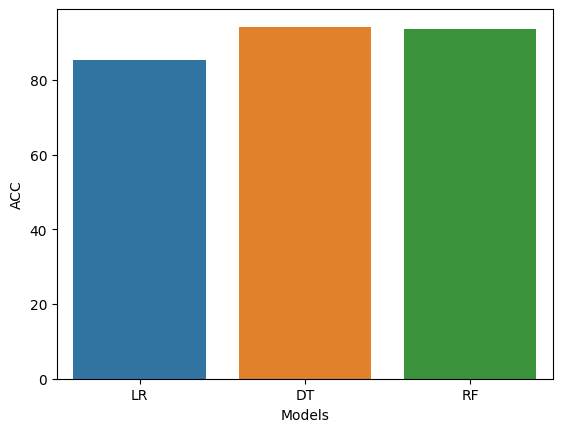

In [41]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'], hue =final_data['Models'])

# Over-sampling

## Train set

In [42]:
df

,category,amt,gender,city,state,lat,long,job,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,"Psychologist, counselling",0
1,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,Special educational needs teacher,0
2,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,Nature conservation officer,0
3,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,Patent attorney,0
4,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,Geoscientist,0
1296671,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,"Production assistant, television",0
1296672,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,Naval architect,0
1296673,food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,Volunteer coordinator,0


In [43]:
leb1 = LabelEncoder()
cat_lbl = leb1.fit(df["category"])
df["category_lbl"] = leb1.transform(df["category"])

leb2 = LabelEncoder()
gend_lbl = leb2.fit(df["gender"])
df["gender_lbl"] = leb2.transform(df["gender"])

leb3 = LabelEncoder()
cty_lbl = leb3.fit(df["city"])
df["city_lbl"] = leb3.transform(df["city"])

leb4 = LabelEncoder()
st_lbl = leb4.fit(df["state"])
df["state_lbl"] = leb4.transform(df["state"])


leb5 = LabelEncoder()
j_lbl = leb5.fit(df["job"])
df["job_lbl"] = leb5.transform(df["job"])


In [44]:
df

,category,amt,gender,city,state,lat,long,job,is_fraud,category_lbl,gender_lbl,city_lbl,state_lbl,job_lbl
0,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,"Psychologist, counselling",0,8,0,526,27,370
1,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,Special educational needs teacher,0,4,0,612,47,428
2,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,Nature conservation officer,0,0,1,468,13,307
3,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,Patent attorney,0,2,1,84,26,328
4,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,Dance movement psychotherapist,0,9,1,216,45,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,Geoscientist,0,0,1,330,44,215
1296671,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,"Production assistant, television",0,1,1,813,20,360
1296672,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,Naval architect,0,1,1,346,32,308
1296673,food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,Volunteer coordinator,0,1,1,471,41,485


In [45]:
dff3 = df.drop(['category', 'gender', 'city', 'state', 'job'],axis=1)

In [46]:
dff3

,amt,lat,long,is_fraud,category_lbl,gender_lbl,city_lbl,state_lbl,job_lbl
0,4.97,36.0788,-81.1781,0,8,0,526,27,370
1,107.23,48.8878,-118.2105,0,4,0,612,47,428
2,220.11,42.1808,-112.2620,0,0,1,468,13,307
3,45.00,46.2306,-112.1138,0,2,1,84,26,328
4,41.96,38.4207,-79.4629,0,9,1,216,45,116
...,...,...,...,...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,0,0,1,330,44,215
1296671,51.70,39.2667,-77.5101,0,1,1,813,20,360
1296672,105.93,32.9396,-105.8189,0,1,1,346,32,308
1296673,74.90,43.3526,-102.5411,0,1,1,471,41,485


In [47]:
X_train = dff3.drop('is_fraud', axis=True)
X_train.shape
X_train.head()

,amt,lat,long,category_lbl,gender_lbl,city_lbl,state_lbl,job_lbl
0,4.97,36.0788,-81.1781,8,0,526,27,370
1,107.23,48.8878,-118.2105,4,0,612,47,428
2,220.11,42.1808,-112.2620,0,1,468,13,307
3,45.00,46.2306,-112.1138,2,1,84,26,328
4,41.96,38.4207,-79.4629,9,1,216,45,116


In [48]:
y_train = dff3['is_fraud']
y_train.shape
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
X_res_train, y_res_train = SMOTE().fit_resample(X_train,y_train)

In [51]:
y_res_train.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

# Test set

In [52]:
leb_1 = LabelEncoder()
cat_lbl = leb_1.fit(df2["category"])
df2["category_lbl"] = leb_1.transform(df2["category"])

leb_2 = LabelEncoder()
gend_lbl = leb_2.fit(df2["gender"])
df2["gender_lbl"] = leb_2.transform(df2["gender"])

leb_3 = LabelEncoder()
cty_lbl = leb_3.fit(df2["city"])
df2["city_lbl"] = leb_3.transform(df2["city"])

leb_4 = LabelEncoder()
st_lbl = leb_4.fit(df2["state"])
df2["state_lbl"] = leb_4.transform(df2["state"])


leb_5 = LabelEncoder()
j_lbl = leb_5.fit(df2["job"])
df2["job_lbl"] = leb_5.transform(df2["job"])

#############################################

dff4 = df2.drop(['category', 'gender', 'city', 'state', 'job'],axis=1)

#############################################

X_test = dff4.drop('is_fraud', axis=True)
y_test = dff4['is_fraud']

#############################################

X_res_test, y_res_test = SMOTE().fit_resample(X_test,y_test)

y_res_test.value_counts()


is_fraud
0    553574
1    553574
Name: count, dtype: int64

#  1. Logistic Regression

In [53]:
LOG= LogisticRegression(solver='lbfgs', max_iter=250)
LOG.fit(X_res_train,y_res_train)

y_pred_1= LOG.predict(X_res_test)

print("Accuracy: ", accuracy_score(y_res_test,y_pred_1))

Accuracy:  0.8509142409144939


In [54]:
print("Precision: ", precision_score(y_res_test,y_pred_1))

Precision:  0.9183381644176641


In [55]:
print("Recall: ", recall_score(y_res_test,y_pred_1))

Recall:  0.7703288087952107


In [56]:
print("F1 score: ", f1_score(y_res_test,y_pred_1))

F1 score:  0.8378470775929142


#  2. Decision Tree Classifier

In [57]:
DT = DecisionTreeClassifier()
DT.fit(X_res_train,y_res_train)
y_pred_2 = DT.predict(X_res_test)

In [58]:
print("Accuracy: ", accuracy_score(y_res_test,y_pred_2))
print("Precision: ", precision_score(y_res_test,y_pred_2))
print("Recall: ", recall_score(y_res_test,y_pred_2))
print("F1 score: ", f1_score(y_res_test,y_pred_2))

Accuracy:  0.8707480842669634
Precision:  0.9455454464539631
Recall:  0.7868089903066257
F1 score:  0.8589046701143249


#  3. Random Forest Classifier

In [59]:
RF = RandomForestClassifier()
RF.fit(X_res_train.values, y_res_train.values)
y_pred_3 = RF.predict(X_res_test.values)

# .values is added because warning coming while predict
# "UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names"

In [60]:
print("Accuracy: ", accuracy_score(y_res_test,y_pred_3)*100)
print("Precision: ", precision_score(y_res_test,y_pred_3)*100)
print("Recall: ", recall_score(y_res_test,y_pred_3)*100)
print("F1 score: ", f1_score(y_res_test,y_pred_3)*100)

Accuracy:  90.59683077601188
Precision:  96.66092921759605
Recall:  84.09878354113451
F1 score:  89.94334455494322


In [61]:
final_data_2 = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_res_test,y_pred_1)*100,
                     accuracy_score(y_res_test,y_pred_2)*100,
                     accuracy_score(y_res_test,y_pred_3)*100
                    ]})
final_data_2

,Models,ACC
0,LR,85.091424
1,DT,87.074808
2,RF,90.596831


<Axes: xlabel='Models', ylabel='ACC'>

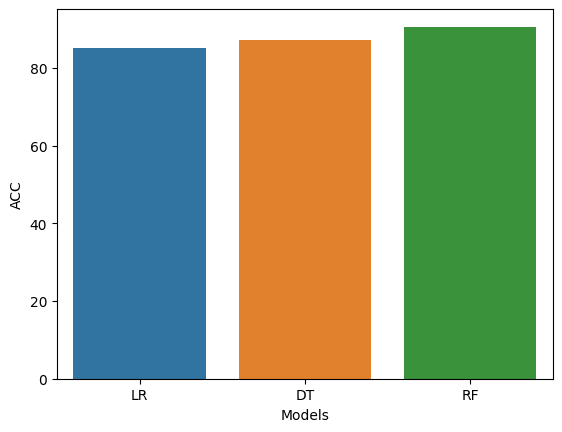

In [62]:
sns.barplot(x=final_data_2['Models'], y=final_data_2['ACC'], hue =final_data_2['Models'])

# Save the Best model

In [63]:
import joblib
import pickle
joblib.dump(RF,"CreditCard_model.pkl")

model = joblib.load("CreditCard_model.pkl")

# Prediction

In [64]:
import subprocess
import os

%pip install pyngrok
from pyngrok import ngrok

In [65]:
#setup ngrok with authtoken
#sign in to your ngrok account and paste Authentication Token here
ngrok.set_auth_token("2jw2qqtRHsF6XTTVn5xT6fGHHbS_7q4BDgUWnf4PLX1RGrMcK")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#Retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://575a-34-168-114-17.ngrok-free.app" -> "http://localhost:5000"


In [66]:
from flask import Flask, request, jsonify
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('CreditCard_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Credit Card Fraud Detection</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 100%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Credit Card Fraud Detection</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="amt">amt:</label>
        <input type="text" id="amt" name="amt"><br><br>

        <label for="lat">lat:</label>
        <input type="text" id="lat" name="lat"><br><br>

        <label for="long">long:</label>
        <input type="text" id="long" name="long"><br><br>

        <label for="category_lbl">category_lbl:</label>
        <input type="text" id="category_lbl" name="category_lbl"><br><br>

        <label for="gender_lbl">gender_lbl(Female:0/Male:1):</label>
        <input type="text" id="gender_lbl" name="gender_lbl"><br><br>

        <label for="city_lbl">city_lbl:</label>
        <input type="text" id="city_lbl" name="city_lbl"><br><br>

        <label for="state_lbl">state_lbl:</label>
        <input type="text" id="state_lbl" name="state_lbl"><br><br>

        <label for="job_lbl">job_lbl:</label>
        <input type="text" id="job_lbl" name="job_lbl"><br><br>

        <button type="button" onclick="predictFraud()">Predict</button>
    </form>

    <p id="predictionResult"></p>

    <img src="https://ai-journey.com/wp-content/uploads/2019/06/fraud-EMV-chip-credit-card.jpg" alt="Credit Card Image">

    <script>
        function predictFraud() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Fraud Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    amt = request.form['amt']
    lat = request.form['lat']
    long = request.form['long']
    category_lbl = request.form['category_lbl']
    gender_lbl = request.form['gender_lbl']
    city_lbl = request.form['city_lbl']
    state_lbl = request.form['state_lbl']
    job_lbl = request.form['job_lbl']

    # Convert data to appropriate types
    amt = float(amt)
    lat = float(lat)
    long = float(long)
    category_lbl = int(category_lbl)
    gender_lbl = int(gender_lbl)
    city_lbl = int(city_lbl)
    state_lbl = int(state_lbl)
    job_lbl = int(job_lbl)

    # Make prediction
    features = [[amt, lat, long, category_lbl, gender_lbl, city_lbl, state_lbl, job_lbl]]
    prediction = model.predict(features)
    if prediction == 0:
        print("Legitimate Transcation.")
    else:
        print("Fraudulent Transcation!")

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://e769-34-168-114-17.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 17:24:43] "GET / HTTP/1.1" 200 -


In [67]:
# if Fraud Prediction: 0  then Legitimate Transcation

# if Fraud Prediction: 1  then Fraudlent Transcation
